In [5]:
!wget https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py
%pip install torchvision
%pip install torchinfo
%pip install pytorchcv
%pip install tensorflow

import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
from torchinfo import summary
import numpy as np
import pytorchcv
import torchvision

from pytorchcv import load_fashion_mnist, train, plot_results, plot_convolution, display_dataset
load_fashion_mnist(batch_size=128) 

--2024-04-19 10:40:48--  https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6540 (6.4K) [text/plain]
Saving to: ‘pytorchcv.py.1’

pytorchcv.py.1      100%[===================>]   6.39K  --.-KB/s    in 0s      

2024-04-19 10:40:48 (18.1 MB/s) - ‘pytorchcv.py.1’ saved [6540/6540]

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


[1,   100] loss: 0.807, accuracy: 70.69 %
[1,   200] loss: 0.505, accuracy: 76.51 %
[1,   300] loss: 0.421, accuracy: 79.27 %
[1,   400] loss: 0.391, accuracy: 80.86 %
[1,   500] loss: 0.378, accuracy: 81.89 %
[1,   600] loss: 0.352, accuracy: 82.76 %
[1,   700] loss: 0.338, accuracy: 83.51 %
[1,   800] loss: 0.312, accuracy: 84.12 %
[1,   900] loss: 0.324, accuracy: 84.56 %
[2,   100] loss: 0.298, accuracy: 89.33 %
[2,   200] loss: 0.276, accuracy: 89.53 %
[2,   300] loss: 0.295, accuracy: 89.28 %
[2,   400] loss: 0.287, accuracy: 89.40 %
[2,   500] loss: 0.257, accuracy: 89.66 %
[2,   600] loss: 0.261, accuracy: 89.81 %
[2,   700] loss: 0.259, accuracy: 89.87 %
[2,   800] loss: 0.259, accuracy: 89.95 %
[2,   900] loss: 0.251, accuracy: 89.98 %
[3,   100] loss: 0.245, accuracy: 90.39 %
[3,   200] loss: 0.220, accuracy: 91.07 %
[3,   300] loss: 0.224, accuracy: 91.28 %
[3,   400] loss: 0.207, accuracy: 91.50 %
[3,   500] loss: 0.230, accuracy: 91.47 %
[3,   600] loss: 0.232, accuracy: 

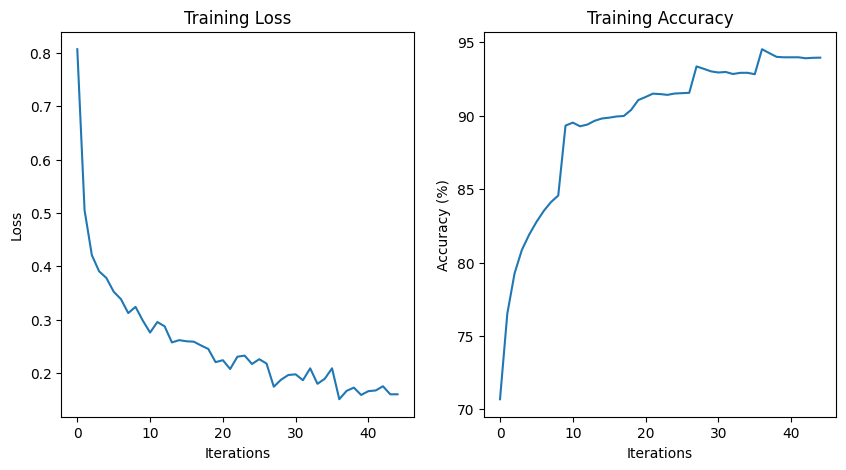

Accuracy of the network on the 10000 test images: 91 %


In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# FashionMNIST 데이터셋 다운로드 및 불러오기
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# CNN 모델 정의
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 256)
        self.fc2 = nn.Linear(256, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 모델 생성 및 손실함수, 옵티마이저 정의
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 손실과 정확도 기록
losses = []
accuracies = []


# 모델 학습
epochs = 5
for epoch in range(epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if i % 100 == 99:
            avg_loss = running_loss / 100
            accuracy = 100 * correct / total
            print('[%d, %5d] loss: %.3f, accuracy: %.2f %%' %
                  (epoch + 1, i + 1, avg_loss, accuracy))
            losses.append(avg_loss)
            accuracies.append(accuracy)
            running_loss = 0.0

print('Finished Training')

# 손실과 정확도 시각화
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.title('Training Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy (%)')

plt.show()

# 테스트 데이터로 모델 평가
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


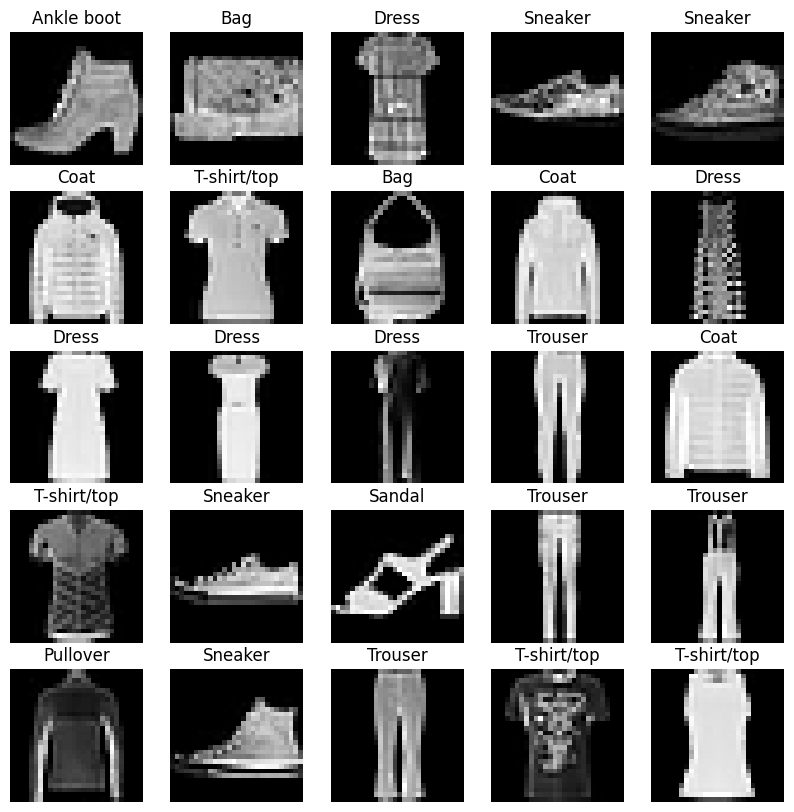

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# FashionMNIST 클래스 레이블
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 데이터 로드
images, labels = next(iter(trainloader))

# 이미지 그리기
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(np.transpose(images[i], (1, 2, 0)).squeeze(), cmap='gray')
    plt.title(classes[labels[i]])
    plt.axis('off')
plt.show()


Accuracy of the network on the 10000 test images: 91 %


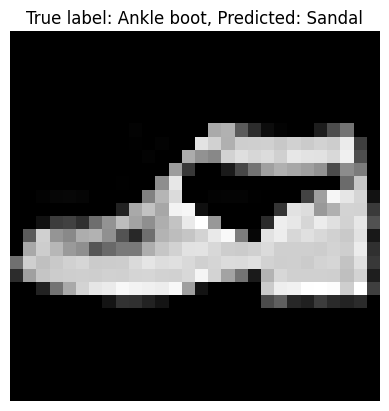

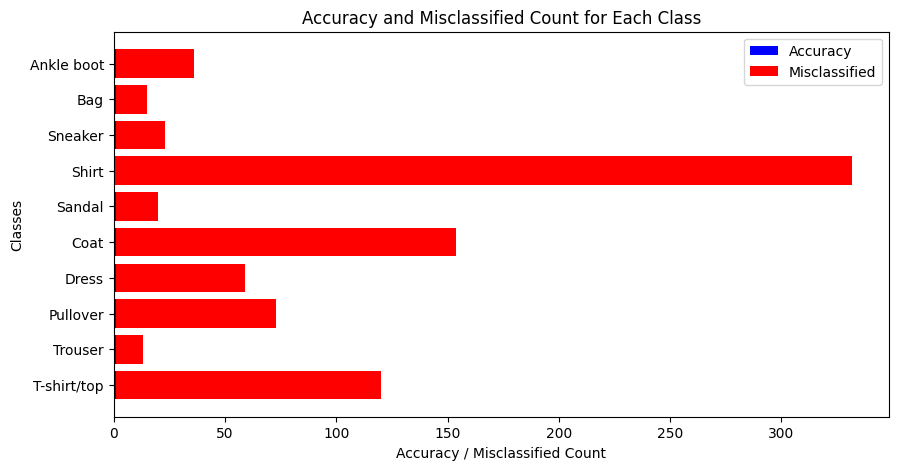

In [30]:
# 테스트 데이터로 모델 평가
correct = 0
total = 0
misclassified_examples = []  # 잘못 분류된 예제 저장
misclassified_targets = []   # 잘못 분류된 예제의 정답 저장
predicted_targets = []       # 잘못 분류된 예제의 예측값 저장
class_correct = list(0. for _ in range(10))  # 각 클래스별 맞은 개수 저장
class_total = list(0. for _ in range(10))    # 각 클래스별 전체 개수 저장

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # 클래스별 정확도 계산
        c = (predicted == labels).squeeze()
        for i in range(len(labels)):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

        # 잘못 분류된 예제 저장
        misclassified_idx = (predicted != labels).nonzero()
        misclassified_examples.extend(images[misclassified_idx])
        misclassified_targets.extend(labels[misclassified_idx])
        predicted_targets.extend(predicted[misclassified_idx])

# 전체 테스트셋 정확도 출력
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

# 잘못 분류된 이미지 중 하나 선택하여 출력
idx = 0  # 임의로 첫 번째 잘못 분류된 예제 선택
misclassified_image = misclassified_examples[idx].squeeze()
true_label = misclassified_targets[idx].item()
predicted_label = predicted_targets[idx].item()

plt.imshow(misclassified_image, cmap='gray')
plt.title(f'True label: {classes[true_label]}, Predicted: {classes[predicted_label]}')
plt.axis('off')
plt.show()

# 각 클래스별 정확도와 오분류된 이미지 수 시각화
plt.figure(figsize=(10, 5))
plt.barh(classes, [class_correct[i] / class_total[i] for i in range(10)], color='blue', label='Accuracy')
plt.barh(classes, [(class_total[i] - class_correct[i]) for i in range(10)], color='red', label='Misclassified', left=[class_correct[i] / class_total[i] for i in range(10)])
plt.xlabel('Accuracy / Misclassified Count')
plt.ylabel('Classes')
plt.title('Accuracy and Misclassified Count for Each Class')
plt.legend()
plt.show()

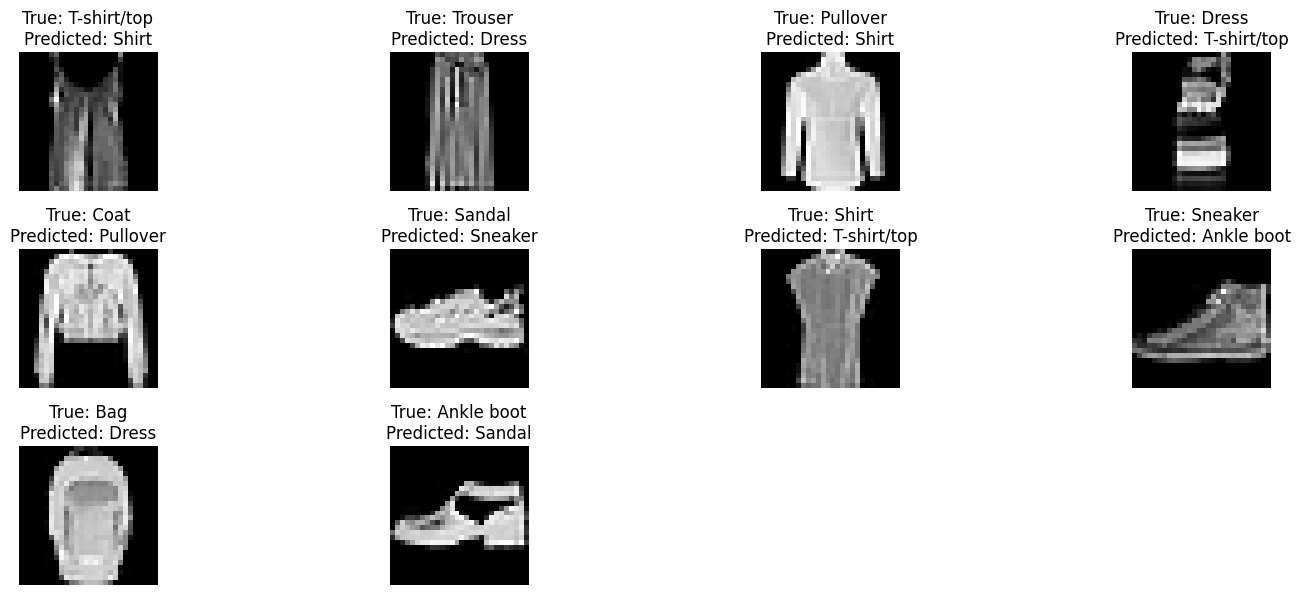

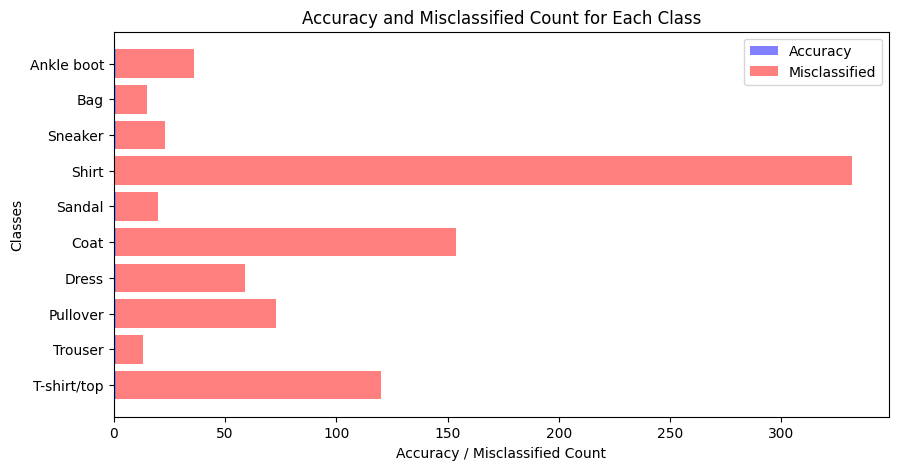

In [31]:
import random

# 라벨별 잘못 분류된 이미지 선택
misclassified_per_class = [[] for _ in range(10)]
for i in range(len(misclassified_targets)):
    label = misclassified_targets[i].item()
    misclassified_per_class[label].append(i)

# 각 라벨별로 하나씩 잘못 분류된 이미지 출력
plt.figure(figsize=(15, 10))
for i in range(10):
    plt.subplot(5, 4, i+1)
    random_idx = random.choice(misclassified_per_class[i])
    image = misclassified_examples[random_idx].squeeze()
    plt.imshow(image, cmap='gray')
    plt.title(f'True: {classes[misclassified_targets[random_idx]]}\nPredicted: {classes[predicted_targets[random_idx]]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# 각 라벨별 정확도와 손실도를 겹쳐진 그래프로 시각화
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.barh(i, class_correct[i] / class_total[i], color='blue', alpha=0.5, label='Accuracy' if i == 0 else '')
    plt.barh(i, (class_total[i] - class_correct[i]), color='red', alpha=0.5, label='Misclassified' if i == 0 else '', left=class_correct[i] / class_total[i])
plt.yticks(range(10), classes)
plt.xlabel('Accuracy / Misclassified Count')
plt.ylabel('Classes')
plt.title('Accuracy and Misclassified Count for Each Class')
plt.legend()
plt.show()


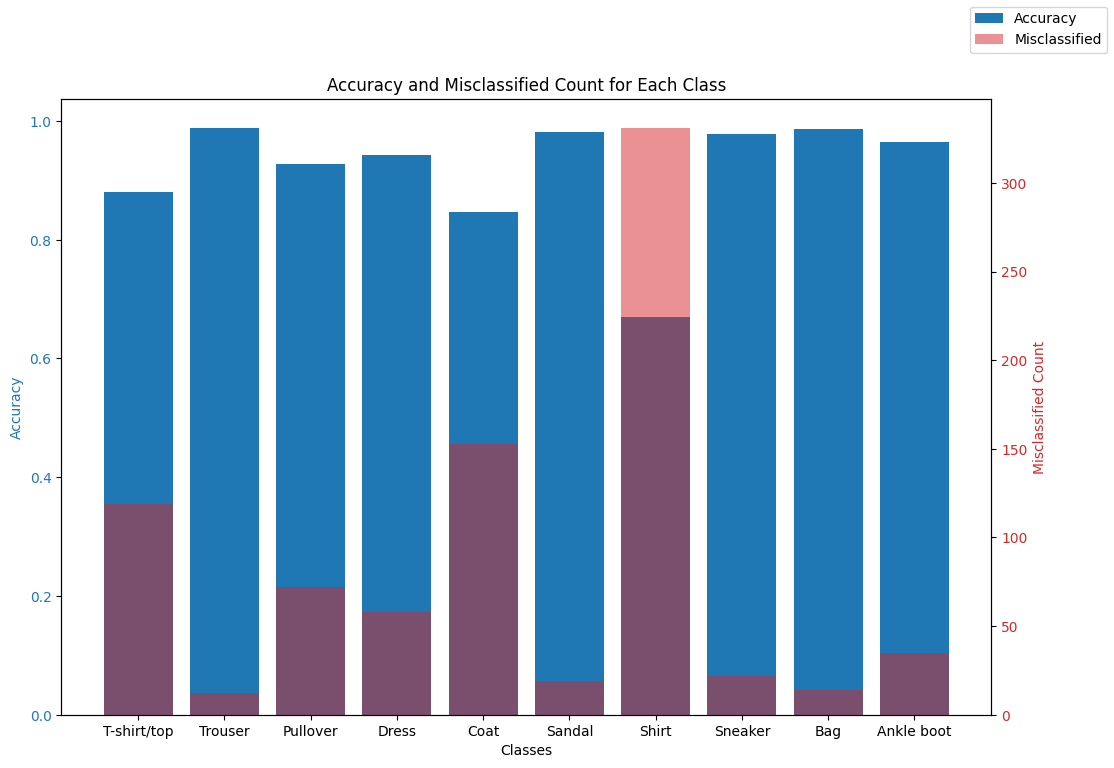

In [32]:
import numpy as np

# 각 라벨별 정확도와 손실도 데이터 생성
accuracy_data = [class_correct[i] / class_total[i] for i in range(10)]
misclassified_data = [(class_total[i] - class_correct[i]) for i in range(10)]

# 라벨별 그래프 생성
fig, ax1 = plt.subplots(figsize=(12, 8))

# 정확도 그래프 생성
color = 'tab:blue'
ax1.set_xlabel('Classes')
ax1.set_ylabel('Accuracy', color=color)
accuracy_bar = ax1.bar(np.arange(10), accuracy_data, color=color, label='Accuracy')
ax1.tick_params(axis='y', labelcolor=color)

# 손실도 그래프 생성
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Misclassified Count', color=color)
misclassified_bar = ax2.bar(np.arange(10), misclassified_data, color=color, alpha=0.5, label='Misclassified')
ax2.tick_params(axis='y', labelcolor=color)

# 라벨 표시
plt.xticks(np.arange(10), classes)

# 범례 표시
fig.legend(loc='upper right')

plt.title('Accuracy and Misclassified Count for Each Class')
plt.show()

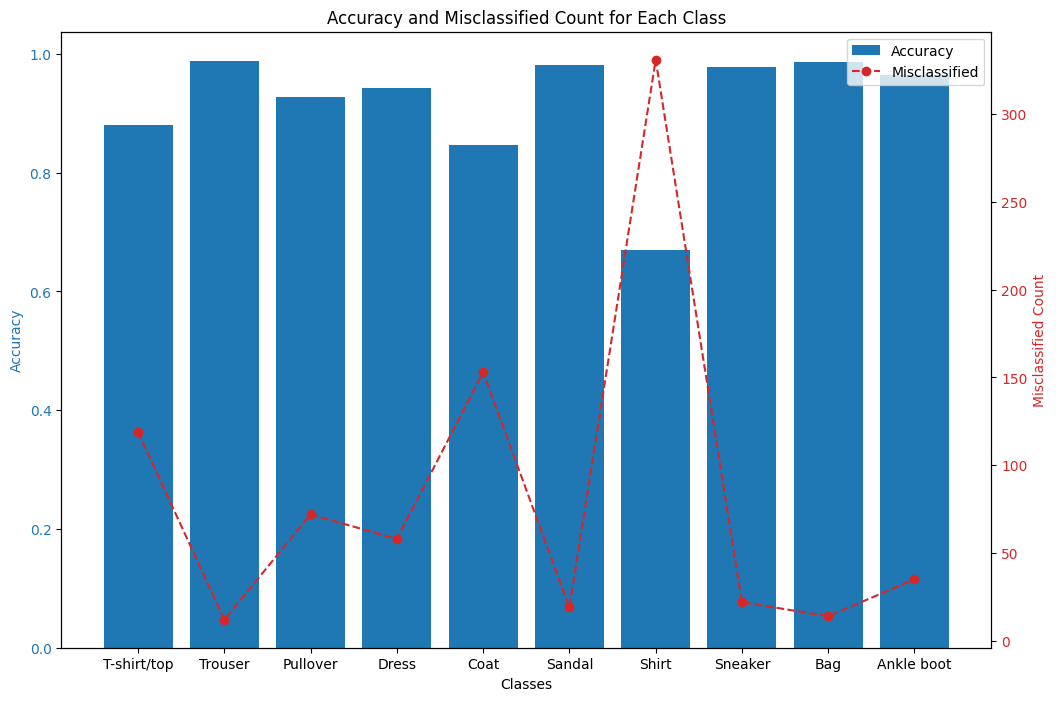

In [33]:
# 라벨별 그래프 생성
fig, ax1 = plt.subplots(figsize=(12, 8))

# 정확도 그래프 생성
color = 'tab:blue'
ax1.set_xlabel('Classes')
ax1.set_ylabel('Accuracy', color=color)
accuracy_bar = ax1.bar(np.arange(10), accuracy_data, color=color, label='Accuracy')
ax1.tick_params(axis='y', labelcolor=color)

# 손실도 그래프 생성
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Misclassified Count', color=color)
misclassified_line = ax2.plot(np.arange(10), misclassified_data, color=color, linestyle='--', marker='o', label='Misclassified')
ax2.tick_params(axis='y', labelcolor=color)

# 라벨 표시
plt.xticks(np.arange(10), classes)

# 범례 표시
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Accuracy and Misclassified Count for Each Class')
plt.show()